#Libraries

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

#Dataset

In [86]:
df = pd.read_csv('data.csv')

In [87]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,44.276,23.107,302.7,2.1,1.4,2021-07-21,105,Aqua,MODIS,51,6.1NRT,289.0,17.8,N
1,44.373,22.968,340.5,2.1,1.4,2021-07-21,850,Terra,MODIS,91,6.1NRT,299.1,112.9,D
2,44.371,22.995,342.5,2.1,1.4,2021-07-21,850,Terra,MODIS,92,6.1NRT,299.3,120.8,D
3,44.360,22.966,316.2,2.1,1.4,2021-07-21,850,Terra,MODIS,29,6.1NRT,299.4,20.6,D
4,44.370,23.001,335.9,2.1,1.4,2021-07-21,850,Terra,MODIS,88,6.1NRT,297.9,90.1,D


In [88]:
df.tail()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
1669,47.85120,32.32329,317.56,1.05,1.02,2021-08-01,2354,Aqua,MODIS,95,6.1NRT,291.82,17.48,N
1670,43.42913,23.42553,308.35,2.39,1.49,2021-08-01,2354,Aqua,MODIS,74,6.1NRT,294.31,24.18,N
1671,43.43102,23.39604,307.89,2.40,1.49,2021-08-01,2354,Aqua,MODIS,73,6.1NRT,296.20,22.43,N
1672,41.94566,25.44026,320.09,1.75,1.30,2021-08-01,2356,Aqua,MODIS,100,6.1NRT,294.33,38.95,N
1673,41.94384,25.46097,312.80,1.75,1.30,2021-08-01,2356,Aqua,MODIS,86,6.1NRT,294.49,24.44,N


In [89]:
df.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp
count,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000
mean,43.105213,21.094351,326.180508,1.579462,1.201703,1166.387097,70.261051,303.249707,34.330030
std,2.700031,5.607944,15.241894,0.806218,0.242866,490.173782,19.350341,8.087580,59.999198
min,37.389660,9.934190,300.090000,1.000000,1.000000,9.000000,0.000000,276.280000,3.440000
25%,41.091797,16.186093,317.350000,1.040000,1.020000,935.000000,58.000000,297.225000,11.107500
50%,43.907765,21.660310,325.465000,1.230000,1.100000,1115.000000,73.000000,304.095000,18.540000
75%,44.859403,24.400770,333.362500,1.720000,1.300000,1210.000000,84.000000,309.107500,36.485000
max,48.802190,33.056700,431.760000,4.610000,2.000000,2356.000000,100.000000,321.120000,1598.070000


In [90]:
df.shape

(1674, 14)

In [91]:
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight'],
      dtype='object')

In [92]:
df.isna()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1670,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1671,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1672,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [93]:
df.isna().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
dtype: int64

#Descriptive Statistics

<ipython-input-104-3e390a048f59>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


Text(0.5, 1.0, 'Heatmap for correlation matrix')

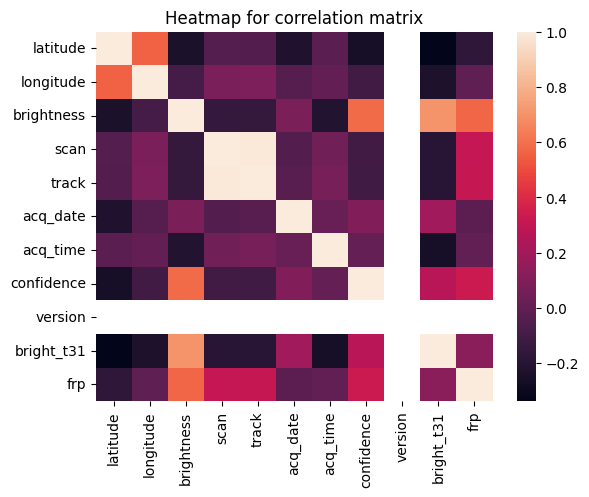

In [104]:
sns.heatmap(df.corr())
plt.title("Heatmap for correlation matrix")

Text(0.5, 0.98, 'Histograms of Numeric Columns')

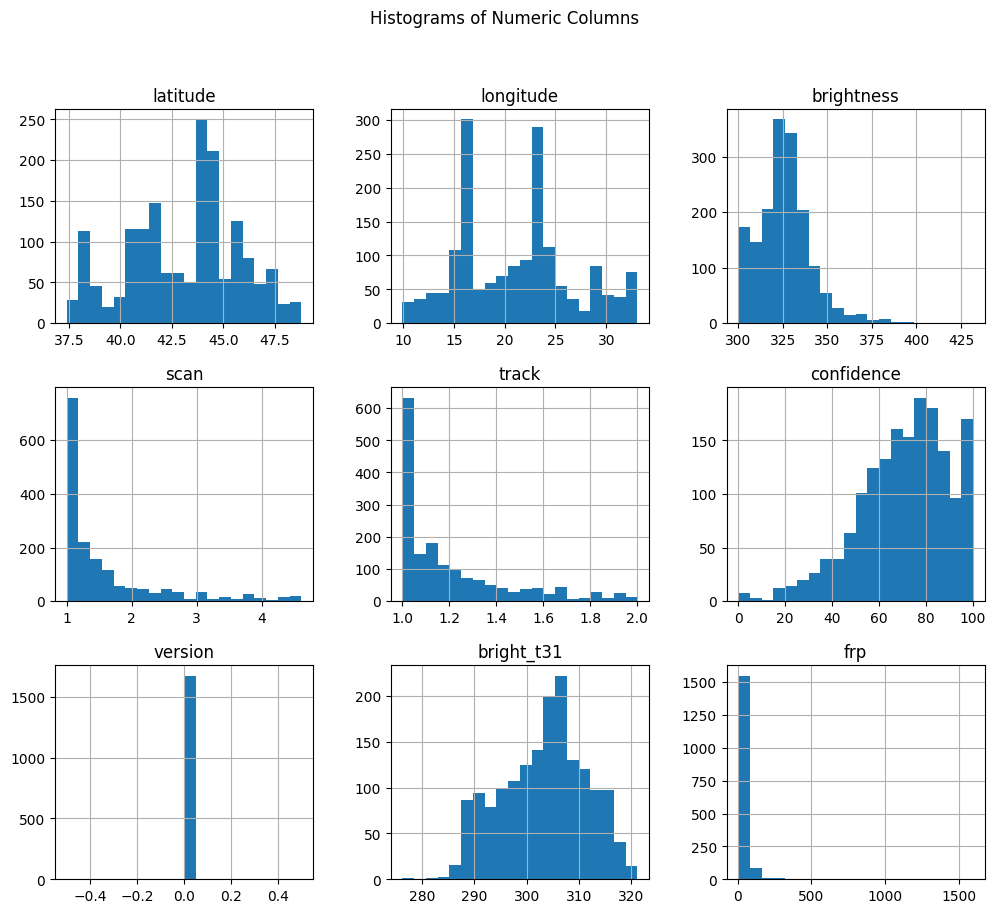

In [107]:
numeric_columns = ['latitude', 'longitude', 'brightness', 'scan', 'track', 'confidence', 'version', 'bright_t31', 'frp']
df[numeric_columns].hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograms of Numeric Columns')

Text(0.5, 1.0, 'Count of Day-Night')

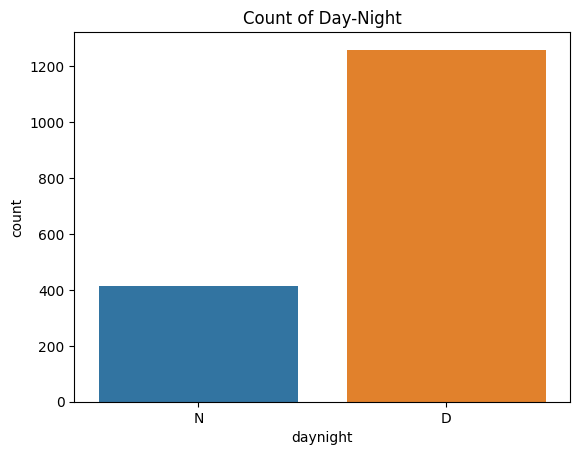

In [105]:
sns.countplot(data=df, x='daynight')
plt.title('Count of Day-Night')

Text(0.5, 1.0, 'Scatter plot of Longitude vs. Latitude (Colored by Day-Night)')

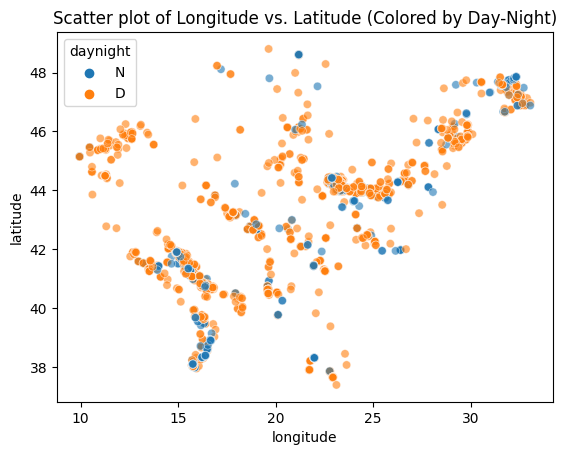

In [111]:
sns.scatterplot(data=df, x='longitude', y='latitude', hue='daynight', alpha=0.6)
plt.title('Scatter plot of Longitude vs. Latitude (Colored by Day-Night)')

In [94]:
df=df.drop("satellite",axis=1)

In [95]:
df=df.drop("instrument",axis=1)

In [96]:
df['acq_date'] = pd.to_datetime(df['acq_date']).apply(lambda date: date.toordinal())

In [97]:
le = LabelEncoder()
df['version'] = le.fit_transform(df['version'])

In [98]:
x = df.drop(['daynight'], axis=1)
y = df['daynight']

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#Gradient Boosting Classifier

In [100]:
model = GradientBoostingClassifier(random_state=42)
model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [101]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           D       1.00      1.00      1.00       366
           N       1.00      1.00      1.00       137

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503

